# **Log data EDA & 파생변수**
- 필요 데이터: user_spec_cleansed.csv, log_data_cleansed_v2.csv

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 12 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (16.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import datetime as dt
import time as tm
sns.set(font="NanumBarunGothic", 
rc={"axes.unicode_minus":False}, style='white')
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. 데이터 불러오기

In [ ]:
user_spec_cleansed=pd.read_csv("/content/drive/MyDrive/빅콘테스트/user_spec_cleansed.csv")

In [ ]:
log_data_cleansed=pd.read_csv("/content/drive/MyDrive/빅콘테스트/log_data_cleansed_v2.csv")

## 2. Timestamp 변수 처리

In [ ]:
log_data_cleansed.head()

,user_id,event,timestamp,mp_os,mp_app_version
0,576409,StartLoanApply,2022-03-25 11:12:09,Android,3.8
1,576409,ViewLoanApplyIntro,2022-03-25 11:12:09,Android,3.8
2,72878,EndLoanApply,2022-03-25 11:14:44,Android,3.8
3,645317,OpenApp,2022-03-25 11:15:09,iOS,3.6
4,645317,UseLoanManage,2022-03-25 11:15:11,iOS,3.6


In [ ]:
log_data_cleansed['timestamp'] = pd.to_datetime(log_data_cleansed['timestamp'])
log_data_cleansed['date']=[d.date() for d in log_data_cleansed['timestamp']]
log_data_cleansed['time']=[d.time() for d in log_data_cleansed['timestamp']]

## 3. EDA

In [ ]:
pd.DataFrame(log_data_cleansed.groupby(log_data_cleansed['user_id'])['event'].count().describe())

,event
count,398723.000000
mean,41.968424
std,72.964015
min,1.000000
25%,9.000000
50%,20.000000
75%,47.000000
max,6491.000000


#### - user_id별 event 수

In [ ]:
log_data_count=log_data_cleansed.groupby(['user_id'])['event'].count().sort_values(ascending=True)
log_data_count

user_id
69366        1
801030       1
530700       1
668799       1
735224       1
          ... 
868369    3323
232737    3387
52440     3413
492109    5855
377301    6491
Name: event, Length: 398723, dtype: int64

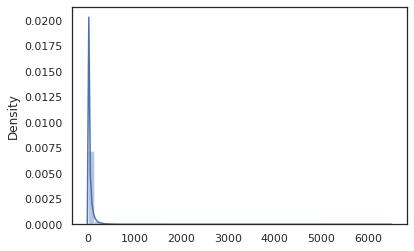

In [ ]:
sns.distplot(log_data_count.values)

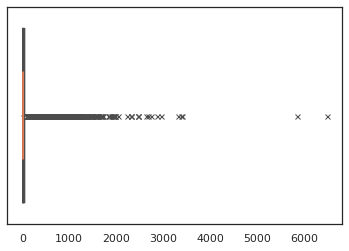

In [ ]:
sns.boxplot(
    log_data_count.values,
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
)

#### - event별 빈도

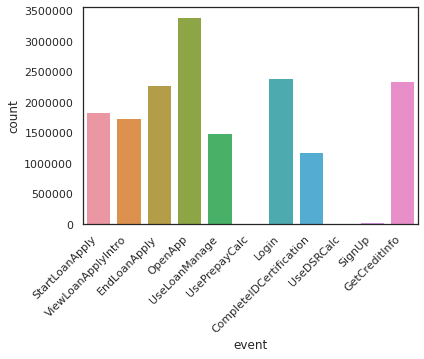

In [ ]:
fig1, ax = plt.subplots()
sns.countplot(log_data_cleansed['event'])
plt.xticks(rotation=45)
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

#### - user id 별 가장 많은 event 활동 수

In [ ]:
log_max=log_data_cleansed.groupby(['user_id']).apply(lambda x: x['event'].value_counts().index[0])

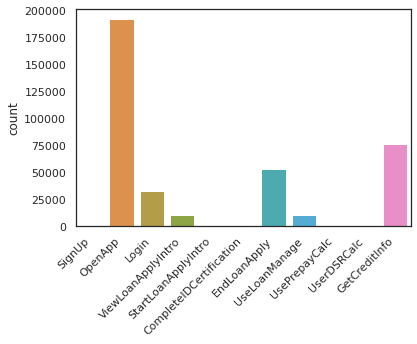

In [ ]:
event_order=['SignUp','OpenApp','Login','ViewLoanApplyIntro','StartLoanApplyIntro','CompleteIDCertification','EndLoanApply','UseLoanManage','UsePrepayCalc','UserDSRCalc','GetCreditInfo']

fig, ax = plt.subplots()
sns.countplot(log_max.values,ax=ax,order=event_order)
plt.xticks(rotation=45)
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### -기대출 여부에 따라 log data eda

In [ ]:
pd.DataFrame(log_data_cleansed.groupby(log_data_cleansed['user_id'])['event'].value_counts())

event
user_id event                         
11      UseLoanManage                9
        GetCreditInfo                8
        EndLoanApply                 7
        OpenApp                      5
        ViewLoanApplyIntro           5
...                                ...
879696  UseLoanManage                2
        CompleteIDCertification      1
        EndLoanApply                 1
        OpenApp                      1
        ViewLoanApplyIntro           1

[1625510 rows x 1 columns]

In [ ]:
user_spec_cleansed.columns

Index(['Unnamed: 0', 'application_id', 'user_id', 'birth_year', 'gender',
       'insert_time', 'credit_score', 'yearly_income', 'income_type',
       'company_enter_month', 'employment_type', 'houseown_type',
       'desired_amount', 'purpose', 'personal_rehabilitation_yn',
       'personal_rehabilitation_complete_yn', 'existing_loan_cnt',
       'existing_loan_amt', 'age', 'age_group'],
      dtype='object')

#### 'existing_loan_cnt' 파생변수 생성

In [ ]:
user_spec_cleansed['existing_loan_cnt'].value_counts()

1.0      241604
3.0      155934
2.0      145545
4.0      144399
5.0      124048
          ...  
107.0         1
67.0          1
71.0          1
169.0         1
102.0         1
Name: existing_loan_cnt, Length: 100, dtype: int64

In [ ]:
user_spec_cleansed[user_spec_cleansed['existing_loan_cnt']==0 ]

,user_id,insert_time,existing_loan_cnt,existing_loan_amt


In [ ]:
user_spec_cleansed.groupby(['user_id'])['existing_loan_cnt'].value_counts()

user_id  existing_loan_cnt
1        1.0                   2
7        7.0                   1
9        1.0                   1
11       1.0                   4
12       5.0                  14
                              ..
879689   6.0                   4
879691   4.0                   5
879692   3.0                   5
879693   3.0                   5
879696   3.0                   2
Name: existing_loan_cnt, Length: 287504, dtype: int64

In [ ]:
len(user_spec_cleansed['user_id'].unique())

405213

In [ ]:
len(user_spec_cleansed.groupby(['user_id'])['existing_loan_cnt'])

405213

#### 기대출 여부에 따라 EDA-이벤트별 전체적인 활동 수

### -Q3보다 높은 사람들 특징 확인

#### Q3보다 높은 데이터 추출

In [ ]:
log_data_cleansed.groupby(log_data_cleansed['user_id'])['event'].count().describe()

count    584636.000000
mean         30.521543
std          64.730702
min           1.000000
25%           3.000000
50%          10.000000
75%          31.000000
max        6853.000000
Name: event, dtype: float64

In [ ]:
overQ3=log_data_cleansed.groupby(['user_id']).filter(lambda x:x['event'].count()>31)

In [ ]:
overQ3.groupby(['user_id'])['event'].count()

user_id
11         43
12        120
20         62
25         33
27        135
         ... 
879683    126
879689     62
879691     72
879692     47
879693     61
Name: event, Length: 145069, dtype: int64

In [ ]:
overQ3

,user_id,date,time,event
0,576409,2022-03-25,11:12:09,StartLoanApply
1,576409,2022-03-25,11:12:09,ViewLoanApplyIntro
2,72878,2022-03-25,11:14:44,EndLoanApply
3,645317,2022-03-25,11:15:09,OpenApp
4,645317,2022-03-25,11:15:11,UseLoanManage
...,...,...,...,...
17843988,242442,2022-05-27,16:08:21,StartLoanApply
17843989,242442,2022-05-27,16:08:21,EndLoanApply
17843990,593062,2022-05-27,16:19:10,OpenApp
17843991,593062,2022-05-27,16:19:15,Login


#### event별 빈도 비교(전체 vs Q3)

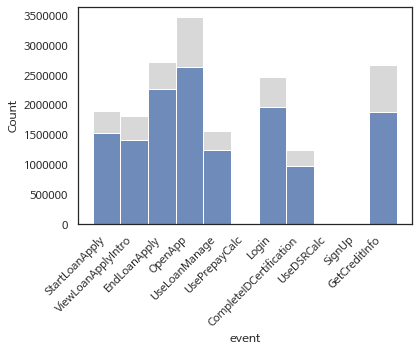

In [ ]:
fig, ax = plt.subplots()

sns.histplot(log_data_cleansed['event'],color='grey',ax=ax,alpha=0.3)
sns.histplot(overQ3['event'],ax=ax,color='b')

plt.xticks(rotation=45)
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

#### user_id별 가장 많았던 활동

In [ ]:
overQ3.groupby(['user_id'])['event'].value_counts()

user_id  event                  
11       UseLoanManage               9
         GetCreditInfo               8
         EndLoanApply                7
         OpenApp                     5
         ViewLoanApplyIntro          5
                                    ..
879693   ViewLoanApplyIntro         10
         OpenApp                     9
         CompleteIDCertification     6
         UseLoanManage               5
         GetCreditInfo               2
Name: event, Length: 1113888, dtype: int64

In [ ]:
overQ3_max=overQ3.groupby(['user_id']).apply(lambda x: x['event'].value_counts().index[0])

In [ ]:
overQ3_max

user_id
11             UseLoanManage
12              EndLoanApply
20                   OpenApp
25                   OpenApp
27             GetCreditInfo
                 ...        
879683               OpenApp
879689    ViewLoanApplyIntro
879691               OpenApp
879692         GetCreditInfo
879693        StartLoanApply
Length: 145069, dtype: object

In [ ]:
print(log_max.value_counts())

OpenApp                    203833
GetCreditInfo              189940
EndLoanApply                82423
Login                       48734
StartLoanApply              30680
UseLoanManage               15774
ViewLoanApplyIntro           9773
CompleteIDCertification      3326
SignUp                        113
UsePrepayCalc                  32
UseDSRCalc                      8
dtype: int64
11


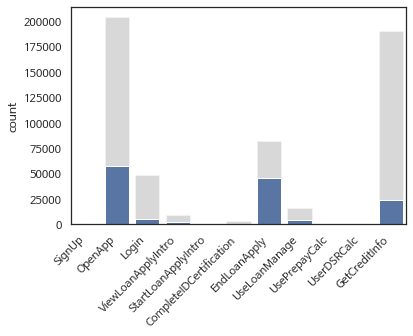

In [ ]:
fig, ax = plt.subplots()

sns.countplot(log_max.values,color='grey',ax=ax,alpha=0.3,order=event_order)
sns.countplot(overQ3_max.values,ax=ax,color='b',order=event_order)

plt.xticks(rotation=45)
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.show()